reading pdf from from /Users/yogic/git/mmda/ai2_internal/citation_mentions/data/arxiv-1906.08632-page0.pdf



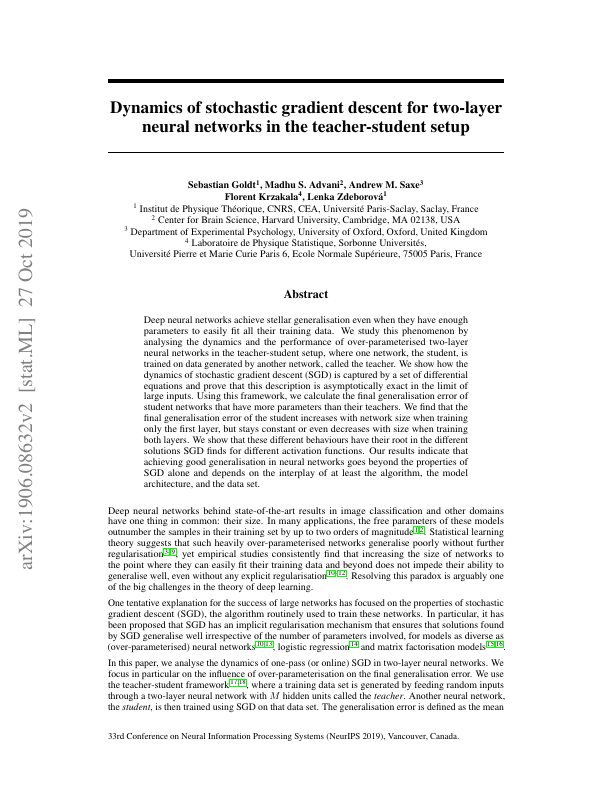

In [1]:
import pathlib

from mmda.parsers.pdfplumber_parser import PDFPlumberParser, _SPLIT_AT_PUNCTUATION
from mmda.predictors.hf_predictors.mention_predictor import MentionPredictor
from mmda.rasterizers.rasterizer import PDF2ImageRasterizer

# download from s3://ai2-s2-mmda/models/citation-mentions/2022-07-27-minilm-10k/model/artifacts.tar.gz
artifacts_dir = pathlib.Path.home() / "git" / "mmda" / "temp" / "weights"
pdf_file = pathlib.Path.home() / "git" / "mmda" / "ai2_internal" / "citation_mentions" / "data" / "arxiv-1906.08632-page0.pdf"

print(f"reading pdf from from {pdf_file}\n")

images = PDF2ImageRasterizer().rasterize(pdf_file, dpi=72)
display(images[0])

In [3]:
print(f"reading artifacts from {artifacts_dir}")

pdf_plumber = PDFPlumberParser(split_at_punctuation=_SPLIT_AT_PUNCTUATION)
doc = pdf_plumber.parse(str(pdf_file))

mentions = MentionPredictor(str(artifacts_dir)).predict(doc)
doc.annotate(mentions=mentions)

for mention in doc.mentions:
    print(mention.symbols)

reading artifacts from /Users/yogic/git/mmda/temp/weights
['1']
['2']
['3']
['9']
['10']
['12']
['10']
['13']
['14']
['15']
['16']
['17']
['18']


In [12]:
from ai2_internal.citation_mentions.interface import Instance, Prediction
from mmda.types import api
import requests

url = 'http://citation-mentions.v0.prod.models.s2.allenai.org/invocations'
instances = [
    Instance(
        symbols=doc.symbols, 
        tokens=[api.SpanGroup.from_mmda(sg) for sg in doc.tokens],
        rows=[api.SpanGroup.from_mmda(sg) for sg in doc.rows],
        pages=[api.SpanGroup.from_mmda(sg) for sg in doc.pages]
    )
]
# resp = requests.post(url, json={"instances": [i.dict() for i in instances]}).json()
# predictions = [
#     Prediction(**p)
#     for p in resp['predictions']
# ]

# doc.annotate(mentions=[mention.to_mmda() for mention in predictions[0].mentions])

# for mention in doc.mentions:
#     print(mention.symbols)

['1,2']
['3']
['9']
['10']
['12']
['10,13']
['14']
['15,16']
['17,18']
